# Rain and Collision Analysis

* If rain has an effect on the number of traffic collisions in Los Angeles, then there will be a difference between the number of collisions on rainy and non-rainy workdays (Mon-Fri). 

* Focus on Mon-Fri as weekends may have extra variables that affect amount of traffic in a city like LA, such as sports events or festivals.

In [175]:
# Dependencies
import csv
import pandas as pd
from matplotlib import pyplot as plt
from scipy import stats
import numpy as np
import datetime as dt

# Load csv
file_to_load = "Result/Daily_weather_and_collision_2016.csv"

In [218]:
# Read csv as df
weathercoll_df = pd.read_csv(file_to_load)

# Create lists to store date data
year_list=[]
date_list=[]
day_of_week=[]
full_date = []

# Add data to lists
for date in weathercoll_df["Date"]:
    date= datetime.datetime.strptime(date,'%m/%d/%Y')
    full_date.append(f"{date.year}-{date.month}-{date.day}")
    year_list.append(date.year)
    date_list.append(f"{date.month}/{date.day}")

# add weekday column do dataframe
weathercoll_df["Date in Full"]=full_date
weathercoll_df["Date in Full"] = pd.to_datetime(weathercoll_df["Date in Full"])
weathercoll_df["Day of Week"] = weathercoll_df["Date in Full"].dt.day_name()

# Remove Saturdays, Sundays
saturday = weathercoll_df[weathercoll_df["Day of Week"] == "Saturday"]
sunday = weathercoll_df[weathercoll_df["Day of Week"] == "Sunday"]
weekdaycoll_df = weathercoll_df.drop(saturday.index, axis=0)
weekdaycoll_df = weekdaycoll_df.drop(sunday.index, axis=0)
weekdaycoll_df = weekdaycoll_df.drop(["Date in Full"], axis=1)
weekdaycoll_df.head()

,Date,Temp High,Temp Low,Rain level (inches),Collision Count,Day of Week
0,1/1/2016,64.34,46.96,0.0000,137,Friday
3,1/4/2016,67.59,55.12,0.0010,122,Monday
4,1/5/2016,56.98,47.89,1.1730,128,Tuesday
5,1/6/2016,55.21,46.48,0.8305,135,Wednesday
6,1/7/2016,57.41,44.41,0.3210,136,Thursday


# Data Cleanup

### Splitting above dataframe into two dataframes, based on Rain level being above or below 0.001 inches of rain

In [219]:
# Sort df by highest rain to lowest
rainlevel_df = weekdaycoll_df.sort_values(by="Rain level (inches)", ascending = False)

# Delete irrelevant columns
rainlevel_df = rainlevel_df.drop(["Temp High", "Temp Low"], axis=1)

# Create table of days only with more than 0.09 inches of rain
raining = rainlevel_df[rainlevel_df["Rain level (inches)"] <= 0.001]
rain_df = rainlevel_df.drop(raining.index, axis=0)
rain_df.head()

,Date,Rain level (inches),Collision Count,Day of Week
354,12/20/2016,3.2865,137,Tuesday
357,12/23/2016,1.3290,183,Friday
4,1/5/2016,1.1730,128,Tuesday
70,3/11/2016,0.8880,185,Friday
5,1/6/2016,0.8305,135,Wednesday


In [220]:
# Create table of days only with less than 0.09 inches of rain
rainless = rainlevel_df[rainlevel_df["Rain level (inches)"] > 0.001]
rainless_df = rainlevel_df.drop(rainless.index, axis=0)
rainless_df.head()

,Date,Rain level (inches),Collision Count,Day of Week
360,12/26/2016,0.001,115,Monday
305,11/1/2016,0.001,166,Tuesday
230,8/18/2016,0.001,146,Thursday
166,6/15/2016,0.001,139,Wednesday
13,1/14/2016,0.001,133,Thursday


# Scatterplot analysis

### Judging from the scatterplot below, there does not seem to be a notable difference in collisions per day between rainy and non-rainy days. There are two outliers for this graph that happen to be rainy days, however they appear to be coincidental to rain.

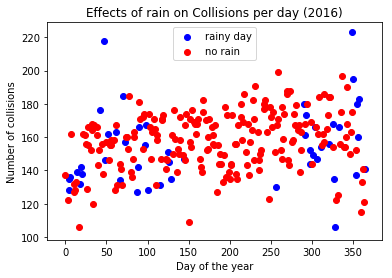

In [225]:
# Scatterplot rainy vs no rain
x_limit = len(weathercoll_df["Date"])
x_axis = np.arange(0, x_limit, 1)

data_rain = rain_df["Collision Count"]
data_rainless = rainless_df["Collision Count"]

plt.scatter(data_rain.index, data_rain, marker="o", facecolors='blue', label="rainy day")
plt.scatter(data_rainless.index, data_rainless, marker="o", facecolors='red', label="no rain")
plt.xlabel("Day of the year")
plt.ylabel("Number of collisions")
plt.title("Effects of rain on Collisions per day (2016)")
plt.legend()

# Bar plot analysis

### "IF" the p-value from a t-test shows that the difference between these two means are statistically significant, and not by coincidence, then we can conclude that rainy days make a difference in the amount of traffic collisions. However, judging by this bar graph of the means, the difference may not be that high, as the average number of collisions for both categories are very close to each other. 

(0, 180)

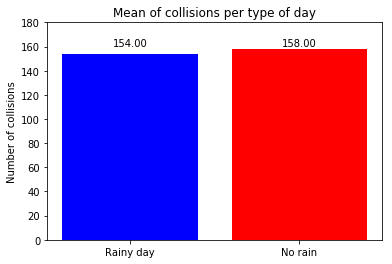

In [222]:
# Bar plot comparing means
rain_mean = data_rain.mean()
rainless_mean = data_rainless.mean()
means = [rain_mean, rainless_mean]
bar_label = ["Rainy day", "No rain"]
colors = ['b', 'r']
plt.bar(bar_label, means, color=colors)
plt.text(-.1, 160, "{0:.2f}".format(round(rain_mean)))
plt.text(.9, 160, "{0:.2f}".format(round(rainless_mean)))
plt.title("Mean of collisions per type of day")
plt.ylabel("Number of collisions")
plt.ylim(0,180)

In [223]:
# Run t-test; Welch's test as sample sizes are not equal
(statistic, pvalue) = stats.ttest_ind(data_rain, data_rainless, equal_var=False) 
print(f"The p-value is {pvalue}.") 
print(f"The t-statistic is {statistic}.") 

The p-value is 0.3009427725318841.
The t-statistic is -1.0435164061279734.


# Conclusion
----

### Analysis

* From the tests ran on the data, the t-test shows that the difference in accidents between rainy and non-rainy days are not statistically significant. We could not conclude that rainy days have an affect on the average number of collisions per day. This may seem surprising, as we may associate rain with more hazardous road conditions. Thus, this finding may be attributed to drivers adjusting their behaviors in anticipation of rain and wet roads. People may drive more cautiously and/or speed less, negating any possible increase in risk from rainy conditions, if any. 

* Looking at the two outlier days where there were the most traffic collisions in the year, the amount of rainfall was below 0.5 inches of rain for each respective day, suggesting that any trend with amount of precipitation and amount of accidents would likely be coincidental, and the high amount of accidents would likely be explained by another variable.

* There also may not be enough data to conclusively determine the effects on rain on traffic collisions. There was about 16 inches of rain in Los Angeles in 2016, which was considered an uprise from California's recent drought. Even in the few days there was rain, there was reportedly not a lot of it. If this test were to be reran, an improvement would be to choose a different year or area where the number of rainy days are higher, ideally as close to half of the year as possible. 